<a href="https://colab.research.google.com/github/Tanmay-123-web/Python-Projects/blob/main/Burgerking_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
df = pd.read_excel("/content/sample_data/BurgerKing_Sales_500.xlsx")
print(df)



     Order_ID       Date       City Store_ID       Item_Name   Category  \
0           1 2025-04-18    Chennai   BK_113      Cold Drink  Beverages   
1           2 2025-02-11     Mumbai   BK_117      Veg Burger     Burger   
2           3 2025-06-05    Chennai   BK_119  Whopper Burger     Burger   
3           4 2025-03-04       Pune   BK_103      Cold Drink  Beverages   
4           5 2025-02-17    Chennai   BK_108    Cheese Fries      Fries   
..        ...        ...        ...      ...             ...        ...   
495       496 2025-02-11     Mumbai   BK_107      Veg Burger     Burger   
496       497 2025-01-08  Hyderabad   BK_112  Whopper Burger     Burger   
497       498 2025-02-10  Hyderabad   BK_119  Chicken Burger     Burger   
498       499 2025-05-03     Mumbai   BK_118    French Fries      Fries   
499       500 2025-06-25     Mumbai   BK_109       Milkshake  Beverages   

     Quantity  Price  Total_Sales Payment_Method Customer_ID  
0           1     90           90   

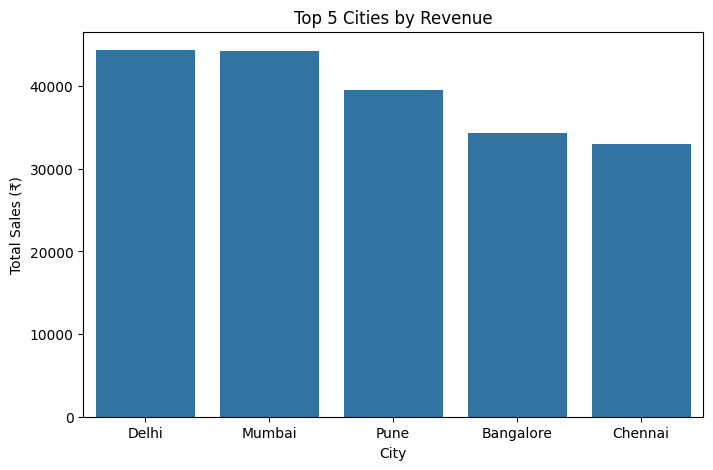

In [31]:
# Top 5 Cities by Revenue

plt.figure(figsize=(8,5))
city_sales = df.groupby('City')['Total_Sales'].sum().sort_values(ascending=False).head(5)

sns.barplot(x=city_sales.index, y=city_sales.values)
plt.title("Top 5 Cities by Revenue")
plt.xlabel("City")
plt.ylabel("Total Sales (₹)")
plt.show()



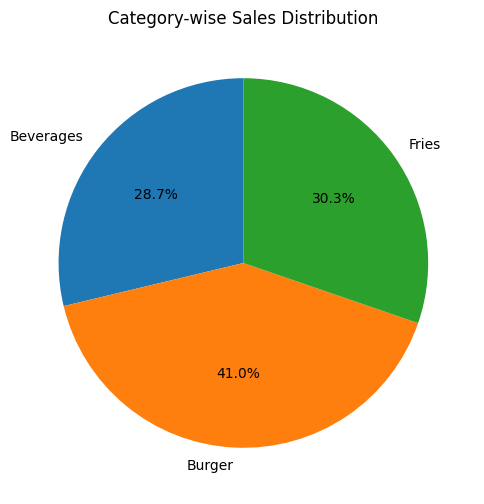

In [32]:
# Category-wise Sales (Pie Chart)

category_sales = df.groupby('Category')['Total_Sales'].sum()

plt.figure(figsize=(6,6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.title("Category-wise Sales Distribution")
plt.show()



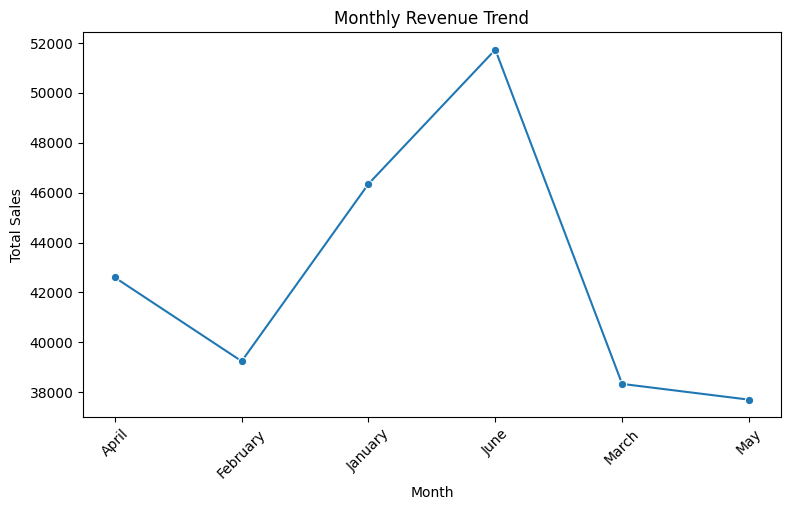

In [45]:
# Monthly Sales Trend

monthly_sales = df.groupby('Month')['Total_Sales'].sum()

plt.figure(figsize=(9,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()




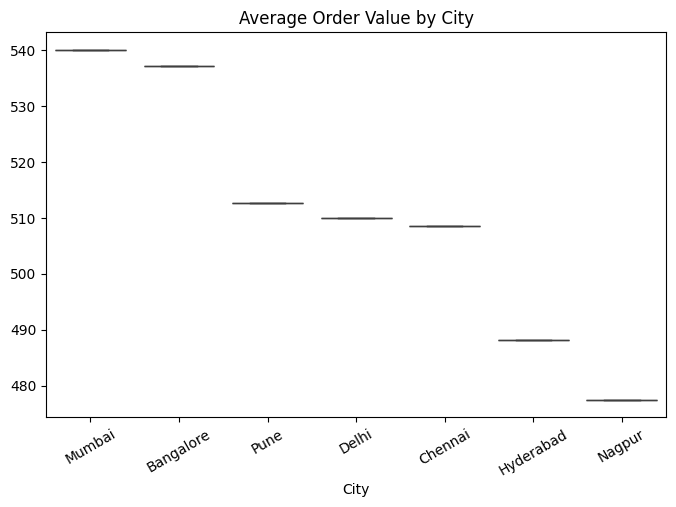

In [35]:
# Average Order Value by City

plt.figure(figsize=(8,5))
avg_city = df.groupby('City')['Total_Sales'].mean().sort_values(ascending=False)

sns.boxplot(x=avg_city.index, y=avg_city.values)
plt.title("Average Order Value by City")
plt.xticks(rotation=30)
plt.show()


In [36]:
# Most Profitable Store

most_profitable_store = (df.groupby('Store_ID')['Total_Sales'].sum().sort_values(ascending=False).head(1).reset_index())

most_profitable_store



,Store_ID,Total_Sales
0,BK_105,19265


In [37]:
# Average Order Value by City


df.groupby('City')['Total_Sales'].mean().sort_values(ascending=False)


,Total_Sales
City,
Mumbai,540.036585
Bangalore,537.203125
Pune,512.714286
Delhi,509.908046
Chennai,508.538462
Hyderabad,488.272727
Nagpur,477.525424


In [38]:
# Payment Method Popularity

df['Payment_Method'].value_counts(normalize=True) * 100



,proportion
Payment_Method,
Card,27.4
UPI,25.6
Cash,24.6
NetBanking,22.4


In [39]:
# Repeat Customer Analysis

repeat_customers = df['Customer_ID'].value_counts()
repeat_customers[repeat_customers > 1].count()


np.int64(139)

In [40]:
# Weekend vs Weekday Sales

df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
df.groupby('Day')['Total_Sales'].sum().sort_values(ascending=False)


,Total_Sales
Day,
Saturday,43008
Thursday,40004
Wednesday,37880
Friday,37713
Monday,34106
Sunday,33806
Tuesday,29443


In [44]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
monthly = df.groupby('Month')['Total_Sales'].sum()
growth = monthly.pct_change() * 100
growth

,Total_Sales
Month,
April,NaN
February,-7.875772
January,18.107227
June,11.603020
March,-25.891200
May,-1.646015
